In [1]:
!pip install pywavelets

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt

In [3]:
def load_image(path):
  image = cv2.imread(path)
  return image

In [4]:
def display_image(image, output_image, output_title):
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title('Original Image')
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  plt.subplot(1, 2, 2)
  plt.title(output_title)
  plt.imshow(output_image, cmap='gray')

  plt.show()

In [5]:
def sobel_edge_detection(image):

    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    Gx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])  # Sobel for horizontal edges

    Gy = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])  #Sobel for vertical edges

    rows, cols = image.shape

    sobel_x = np.zeros_like(image, dtype=float)
    sobel_y = np.zeros_like(image, dtype=float)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = image[i - 1:i + 2, j - 1:j + 2]

            gx_value = np.sum(Gx * region)
            gy_value = np.sum(Gy * region)

            sobel_x[i, j] = gx_value
            sobel_y[i, j] = gy_value

    sobel_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    sobel_magnitude = (sobel_magnitude / np.max(sobel_magnitude)) * 255
    sobel_magnitude = sobel_magnitude.astype(np.uint8)

    return sobel_magnitude




In [6]:
def prewitt_edge_detection(image):

    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    Gx = np.array([[1, 0, -1],
                             [1, 0, -1],
                             [1, 0, -1]])  # Prewitt for horizontal edges

    Gy = np.array([[1, 1, 1],
                             [0, 0, 0],
                             [-1, -1, -1]])

    rows, cols = image.shape

    sobel_x = np.zeros_like(image, dtype=float)
    sobel_y = np.zeros_like(image, dtype=float)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = image[i - 1:i + 2, j - 1:j + 2]

            gx_value = np.sum(Gx * region)
            gy_value = np.sum(Gy * region)

            sobel_x[i, j] = gx_value
            sobel_y[i, j] = gy_value

    prewitt_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    prewitt_magnitude = (prewitt_magnitude / np.max(prewitt_magnitude)) * 255
    prewitt_magnitude = prewitt_magnitude.astype(np.uint8)

    return prewitt_magnitude

In [7]:
def laplacian_edge_detection(image):
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    Gx = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])


    rows, cols = image.shape

    conv_x = np.zeros_like(image, dtype=float)


    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            region = image[i - 1:i + 2, j - 1:j + 2]

            gx_value = np.sum(Gx * region)

            conv_x[i, j] = gx_value


    laplacian_magnitude = np.sqrt(conv_x**2)

    laplacian_magnitude = (laplacian_magnitude / np.max(laplacian_magnitude)) * 255
    laplacian_magnitude = laplacian_magnitude.astype(np.uint8)

    return laplacian_magnitude

In [8]:
def dwt_image_transform(image):
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    titles = ['Approximation', ' Horizontal detail',
            'Vertical detail', 'Diagonal detail']

    coeffs2 = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    fig = plt.figure(figsize=(12, 3))
    for i, a in enumerate([LL, LH, HL, HH]):
        ax = fig.add_subplot(1, 4, i + 1)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(titles[i], fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])

    return LL, LH, HL, HH


In [9]:
def main(path):
  image = load_image(path)
  LL, LH, HL, HH = dwt_image_transform(image)
  edge_image = sobel_edge_detection(image)
  display_image(image, edge_image, 'Sobel Edge Detection without DWT')


  edge_image = laplacian_edge_detection(image)
  display_image(image, edge_image, 'Laplacian Edge Detection without DWT')


  edge_image = sobel_edge_detection(LL)
  display_image(image, edge_image, 'Sobel Edge Detection on LL filter image with DWT')

  edge_image = prewitt_edge_detection(image)
  display_image(image, edge_image, 'Prewitt Edge Detection without DWT')
  edge_image = prewitt_edge_detection(LL)
  display_image(image, edge_image, 'Prewitt Edge Detection on LL filter image with DWT')

  edge_image = laplacian_edge_detection(LL)
  display_image(image, edge_image, 'Laplacian Edge Detection on LL filter image with DWT')

  edge_image_LH = sobel_edge_detection(LH)
  edge_image_LH[edge_image_LH < 50] = 0
  edge_image_HL = sobel_edge_detection(HL)
  edge_image_HL[edge_image_HL < 50] = 0
  edge_image_HH = sobel_edge_detection(HH)
  edge_image_HH[edge_image_HH < 50] = 0

  edge_image = np.sqrt( (edge_image_LH) ** 2 + ( edge_image_HL) ** 2 + (0.1* edge_image_HH) ** 2)
  edge_image = (edge_image / np.max(edge_image)) * 255
  edge_image = edge_image.astype(np.uint8)
  display_image(image, edge_image, 'Sobel Edge Detection on LH, HL and HH filter image with DWT')

  edge_image_LH = prewitt_edge_detection(LH)
  edge_image_LH[edge_image_LH < 50] = 0
  edge_image_HL = prewitt_edge_detection(HL)
  edge_image_HL[edge_image_HL < 50] = 0
  edge_image_HH = prewitt_edge_detection(HH)
  edge_image_HH[edge_image_HH < 50] = 0
  edge_image = np.sqrt(edge_image_LH ** 2 + edge_image_HL ** 2 + edge_image_HH ** 2)
  edge_image = (edge_image / np.max(edge_image)) * 255
  edge_image = edge_image.astype(np.uint8)
  display_image(image, edge_image, 'Prewitt Edge Detection on LH, HL and HH filter image with DWT')

  edge_image_LH = laplacian_edge_detection(LH)
  edge_image_LH[edge_image_LH < 50] = 0
  edge_image_HL = laplacian_edge_detection(HL)
  edge_image_HL[edge_image_HL < 50] = 0
  edge_image_HH = laplacian_edge_detection(HH)
  edge_image_HH[edge_image_HH < 50] = 0
  edge_image = np.sqrt(edge_image_LH ** 2 + edge_image_HL ** 2 + edge_image_HH ** 2)
  edge_image = (edge_image / np.max(edge_image)) * 255
  edge_image = edge_image.astype(np.uint8)
  display_image(image, edge_image, 'Laplacian Edge Detection on LH, HL and HH filter image with DWT')


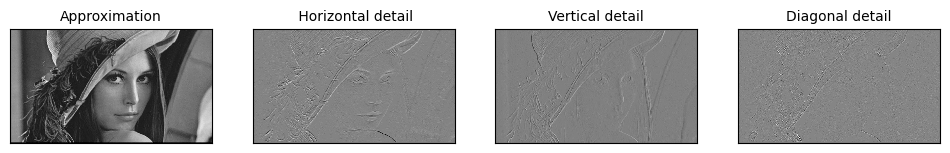

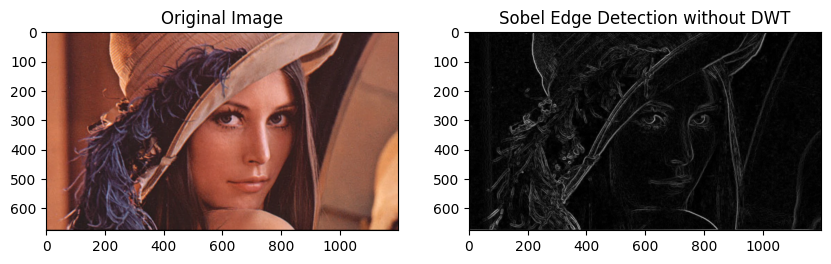

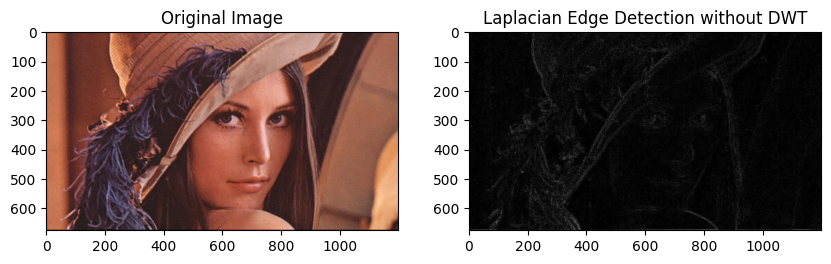

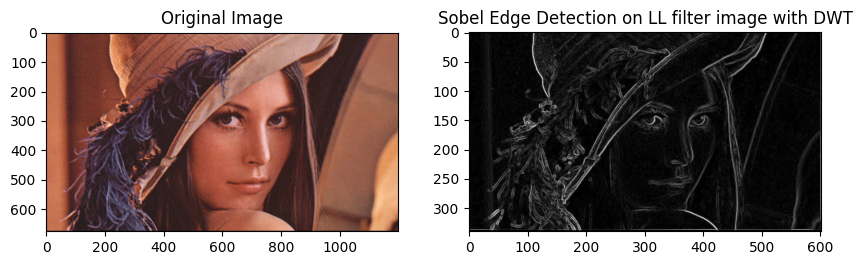

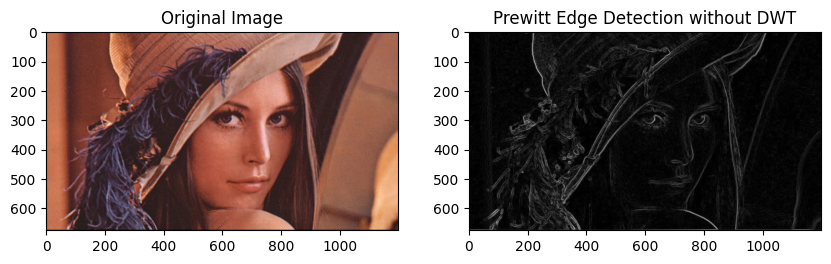

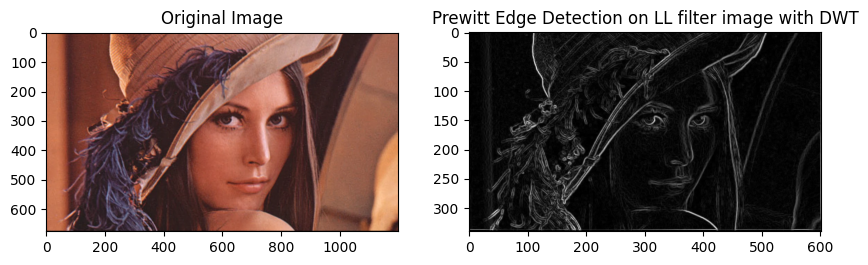

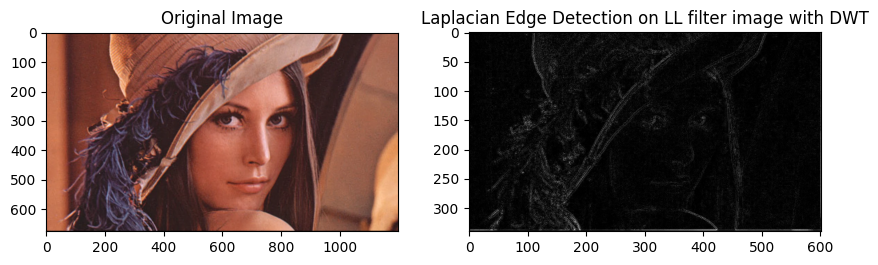

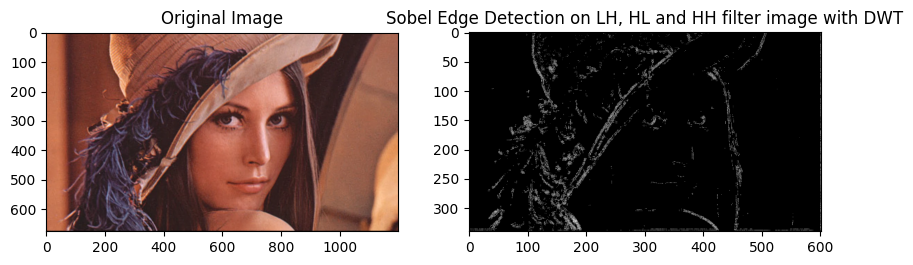

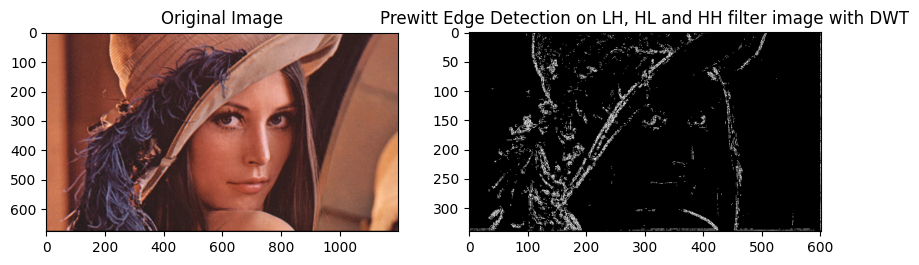

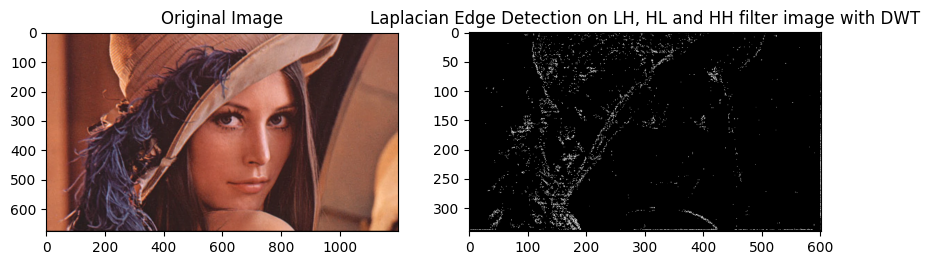

In [10]:
image_path = 'lenna.jpeg'
main(image_path)